In [28]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from datetime import datetime
import tweepy
import re
import math
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

First we get the Data

In [25]:
def Bollinger_Bands(Stock_code, Start_date, End_date = datetime.today().strftime('%Y-%m-%d'), Moving_average_param = 30, Std_param = 1, Show_SMA = True, Show_bands = True):
  RawData = web.DataReader(Stock_code, data_source = 'yahoo', start = Start_date, end = End_date)
  frame = RawData.filter(['Close']).rolling(Moving_average_param).mean()
  frame['Moving_average'] = frame.filter(['Close']).values
  frame['High_bar'] = Std_param * RawData.filter(['Close']).rolling(Moving_average_param).std() + frame.filter(['Close']).values
  frame['Low_bar'] = (-Std_param) * RawData.filter(['Close']).rolling(Moving_average_param).std() + frame.filter(['Close']).values
  frame['Price'] = RawData.filter(['Close'])
  data_frame = pd.DataFrame()
  data_frame = frame.copy()
  plt.figure(figsize=(20,9))
  plt.title('Bollinger band plot')
  plt.plot(frame['Price'])
  legends = [StockCode]
  if Show_SMA:
    plt.plot(frame['Moving_average'])
    legends.append('Moving average')
  if Show_bands:  
    plt.plot(frame['High_bar'])
    plt.plot(frame['Low_bar'])
    legends.append('High bar')
    legends.append('Low bar')
  plt.xlabel('date', fontsize = 18)
  plt.ylabel('prices', fontsize = 18)
  plt.legend(legends)
  plt.show()
  return data_frame.drop(columns = ['Close'])

In [26]:
StockCode = 'AAPL'
start = '2016-01-01'
end = datetime.today().strftime('%Y-%m-%d')
MAparam = 100
STDparam = 3
EndData = pd.DataFrame()

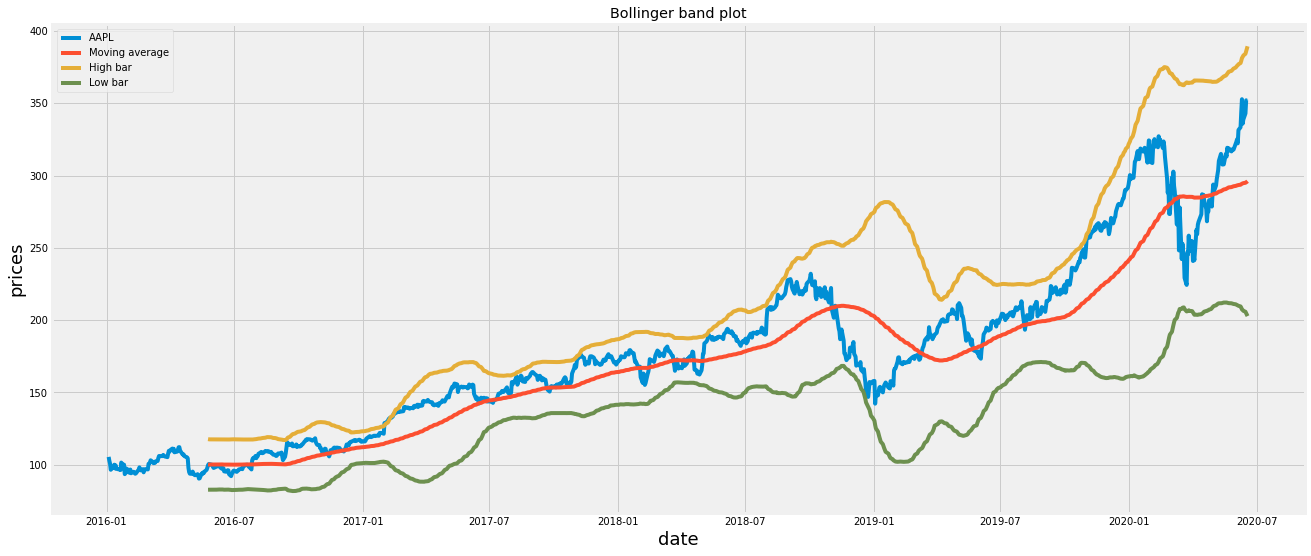

In [27]:
EndData = Bollinger_Bands(Stock_code=StockCode, Start_date=start, End_date=end, Moving_average_param=MAparam, Std_param=STDparam)

In [5]:
print(EndData)

            Moving_average    High_bar     Low_bar       Price
Date                                                          
2016-05-26      100.093900  117.525858   82.661941  100.410004
2016-05-27      100.070300  117.484429   82.656171  100.349998
2016-05-31      100.061900  117.475091   82.648709   99.860001
2016-06-01      100.082000  117.467708   82.696292   98.459999
2016-06-02      100.089600  117.464393   82.714807   97.720001
...                    ...         ...         ...         ...
2020-06-12      294.764500  383.091358  206.437641  338.799988
2020-06-15      295.017399  384.262332  205.772467  342.989990
2020-06-16      295.345899  385.935049  204.756749  352.079987
2020-06-17      295.678699  387.575533  203.781866  351.589996
2020-06-18      296.106499  389.449770  202.763228  351.730011

[1023 rows x 4 columns]


In [46]:
def SMA(Stock_code, Start_date, End_date = datetime.today().strftime('%Y-%m-%d'), Moving_average_param1 = 100, Moving_average_param2 = 50, Moving_average_param3 = 20, 
        show_MA1 = True, show_MA2 = False, show_MA3 = False):
  RawData = web.DataReader(Stock_code, data_source = 'yahoo', start = Start_date, end = End_date)
  frame = RawData.filter(['Close']).rolling(Moving_average_param1).mean()
  frame['Moving_average' + str(Moving_average_param1)] = RawData.filter(['Close']).rolling(Moving_average_param1).mean()
  frame['Moving_average' + str(Moving_average_param2)] = RawData.filter(['Close']).rolling(Moving_average_param2).mean()
  frame['Moving_average' + str(Moving_average_param3)] = RawData.filter(['Close']).rolling(Moving_average_param3).mean()
  frame['Price'] = RawData.filter(['Close'])
  plt.figure(figsize=(20,9))
  plt.title('Simple Moving Average')
  plt.plot(frame['Price'])
  legends = [StockCode]
  if(show_MA1):
    plt.plot(frame['Moving_average' + str(Moving_average_param1)])
    legends.append('SMA' + str(Moving_average_param1))
  if(show_MA2):
    plt.plot(frame['Moving_average' + str(Moving_average_param2)])
    legends.append('SMA' + str(Moving_average_param2))
  if(show_MA3):
    plt.plot(frame['Moving_average' + str(Moving_average_param3)])
    legends.append('SMA' + str(Moving_average_param3))
  plt.xlabel('date', fontsize = 18)
  plt.ylabel('prices', fontsize = 18)
  plt.legend(legends)
  plt.show()
  return frame.drop(columns = ['Close'])

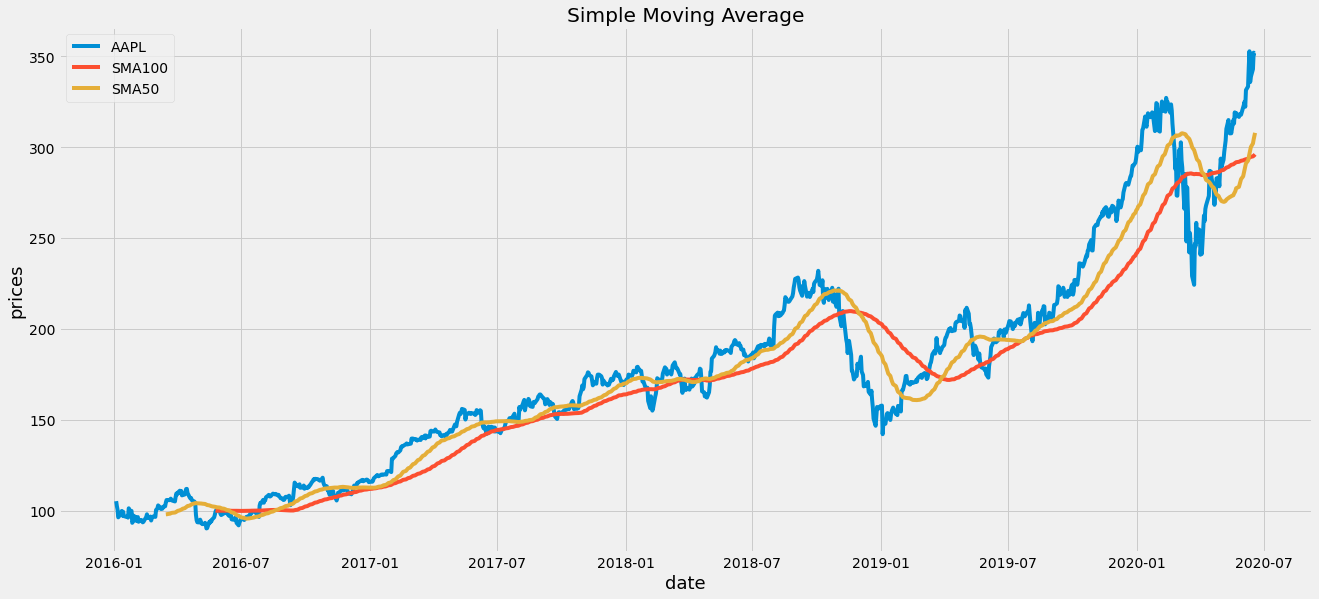

,Moving_average100,Moving_average50,Moving_average20,Price
Date,,,,
2016-01-04,NaN,NaN,NaN,105.349998
2016-01-05,NaN,NaN,NaN,102.709999
2016-01-06,NaN,NaN,NaN,100.699997
2016-01-07,NaN,NaN,NaN,96.449997
2016-01-08,NaN,NaN,NaN,96.959999
...,...,...,...,...
2020-06-12,294.764500,300.160599,324.546500,338.799988
2020-06-15,295.017399,302.121799,326.310500,342.989990
2020-06-16,295.345899,304.335199,328.166499,352.079987


In [48]:
SMA(Stock_code=StockCode, Start_date=start, show_MA2=True)

In [49]:
def WMA(Stock_code, Start_date, End_date = datetime.today().strftime('%Y-%m-%d'), Moving_average_param1 = 100, Moving_average_param2 = 50, 
        Moving_average_param3 = 20, show_MA1 = True, show_MA2 = False, show_MA3 = False):
  RawData = web.DataReader(Stock_code, data_source = 'yahoo', start = Start_date, end = End_date)
  weights1 = np.arange(1, Moving_average_param1 + 1)
  weights2 = np.arange(1, Moving_average_param2 + 1)
  weights3 = np.arange(1, Moving_average_param3 + 1)
  frame = RawData.filter(['Close'])
  frame['Moving_average' + str(Moving_average_param1)] = frame['Close'].rolling(Moving_average_param1).apply(lambda prices: np.dot(prices, weights1)/weights1.sum(), 
  raw=True)
  frame['Moving_average' + str(Moving_average_param2)] = frame['Close'].rolling(Moving_average_param2).apply(lambda prices: np.dot(prices, weights2)/weights2.sum(), 
  raw=True)
  frame['Moving_average' + str(Moving_average_param3)] = frame['Close'].rolling(Moving_average_param3).apply(lambda prices: np.dot(prices, weights3)/weights3.sum(), 
  raw=True)
  frame['Price'] = RawData.filter(['Close'])
  plt.figure(figsize=(20,9))
  plt.title('Weighted Moving Average')
  plt.plot(frame['Price'])
  legends = [StockCode]
  if(show_MA1):
    plt.plot(frame['Moving_average' + str(Moving_average_param1)])
    legends.append('WMA' + str(Moving_average_param1))
  if(show_MA2):
    plt.plot(frame['Moving_average' + str(Moving_average_param2)])
    legends.append('WMA' + str(Moving_average_param2))
  if(show_MA3):
    plt.plot(frame['Moving_average' + str(Moving_average_param3)])
    legends.append('WMA' + str(Moving_average_param3))
  plt.xlabel('date', fontsize = 18)
  plt.ylabel('prices', fontsize = 18)
  plt.legend(legends)
  plt.show()
  return frame.drop(columns = ['Close'])

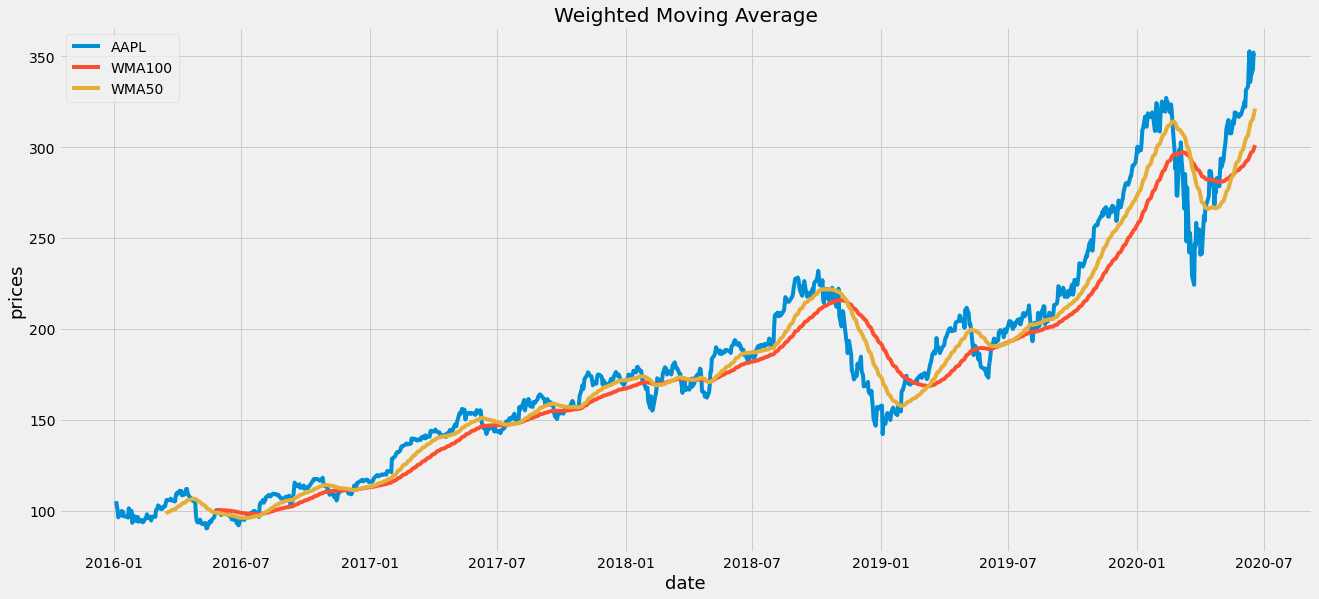

,Moving_average100,Moving_average50,Moving_average20,Price
Date,,,,
2016-01-04,NaN,NaN,NaN,105.349998
2016-01-05,NaN,NaN,NaN,102.709999
2016-01-06,NaN,NaN,NaN,100.699997
2016-01-07,NaN,NaN,NaN,96.449997
2016-01-08,NaN,NaN,NaN,96.959999
...,...,...,...,...
2020-06-12,296.906588,314.053004,329.912283,338.799988
2020-06-15,297.861548,315.732587,331.668806,342.989990
2020-06-16,298.991500,317.691732,334.123043,352.079987


In [51]:
WMA(Stock_code=StockCode, Start_date=start, Moving_average_param1=100, show_MA1=True, show_MA2=True)

In [52]:
def EMA(Stock_code, Start_date, End_date = datetime.today().strftime('%Y-%m-%d'), Moving_average_param1 = 100, Moving_average_param2 = 50, 
        Moving_average_param3 = 20, show_MA1 = True, show_MA2 = False, show_MA3 = False):
  smoothing_factor1 = 2 / (Moving_average_param1 + 1)
  smoothing_factor2 = 2 / (Moving_average_param2 + 1)
  smoothing_factor3 = 2 / (Moving_average_param3 + 1)
  RawData = web.DataReader(Stock_code, data_source = 'yahoo', start = Start_date, end = End_date)
  frame = RawData.filter(['Close'])
  frame['Moving_average' + str(Moving_average_param1)] = RawData.filter(['Close']).rolling(Moving_average_param1).mean()
  frame['Moving_average' + str(Moving_average_param2)] = RawData.filter(['Close']).rolling(Moving_average_param2).mean()
  frame['Moving_average' + str(Moving_average_param3)] = RawData.filter(['Close']).rolling(Moving_average_param3).mean()
  for i in range(1, frame.values.shape[0]):
    if(i > Moving_average_param1):
      frame['Moving_average' + str(Moving_average_param1)].iloc[i] = smoothing_factor1 * frame['Close'].iloc[i]+ (1-smoothing_factor1)*frame['Moving_average' + str(Moving_average_param1)].iloc[i-1]
    if(i > Moving_average_param2):
      frame['Moving_average' + str(Moving_average_param2)].iloc[i] = smoothing_factor2 * frame['Close'].iloc[i]+ (1-smoothing_factor2)*frame['Moving_average' + str(Moving_average_param2)].iloc[i-1]
    if(i > Moving_average_param3):
      frame['Moving_average' + str(Moving_average_param3)].iloc[i] = smoothing_factor3 * frame['Close'].iloc[i]+ (1-smoothing_factor3)*frame['Moving_average' + str(Moving_average_param3)].iloc[i-1]    
  frame['Price'] = RawData.filter(['Close'])
  plt.figure(figsize=(20,9))
  plt.title('Exponetial Moving Average')
  plt.plot(frame['Price'])
  legends = [StockCode]
  if(show_MA1):
    plt.plot(frame['Moving_average' + str(Moving_average_param1)])
    legends.append('EMA' + str(Moving_average_param1))
  if(show_MA2):
    plt.plot(frame['Moving_average' + str(Moving_average_param2)])
    legends.append('EMA' + str(Moving_average_param2))
  if(show_MA3):
    plt.plot(frame['Moving_average' + str(Moving_average_param3)])
    legends.append('EMA' + str(Moving_average_param3))
  plt.xlabel('date', fontsize = 18)
  plt.ylabel('prices', fontsize = 18)
  plt.legend(legends)
  plt.show()
  return frame.drop(columns = ['Close'])

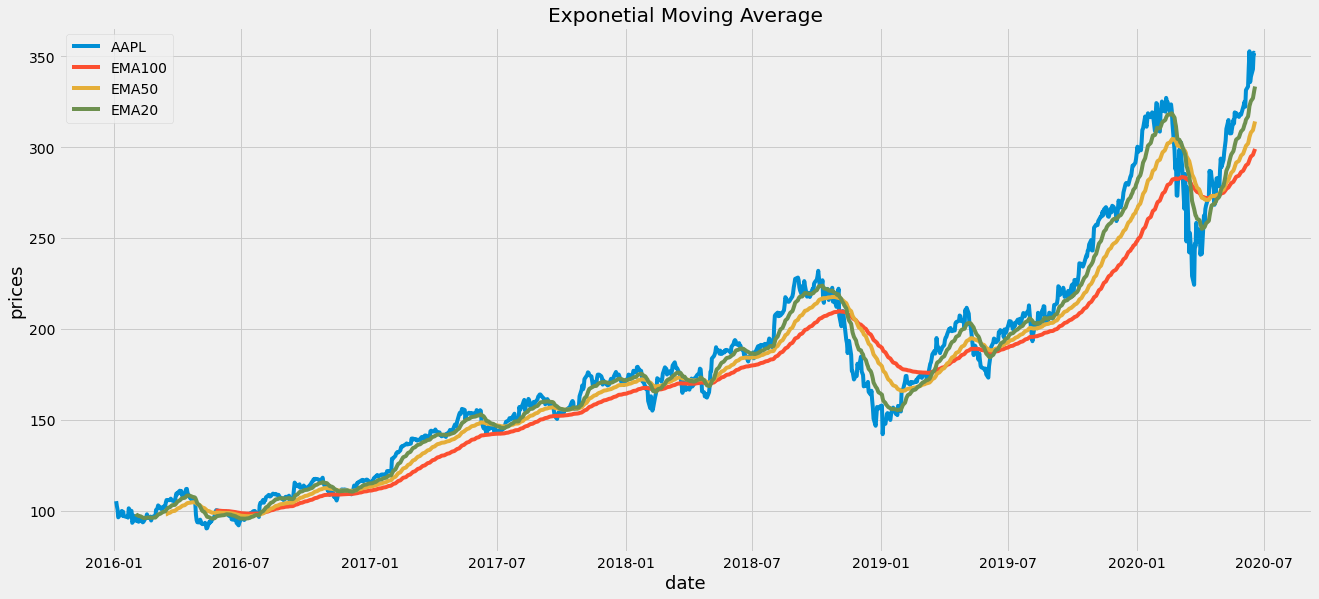

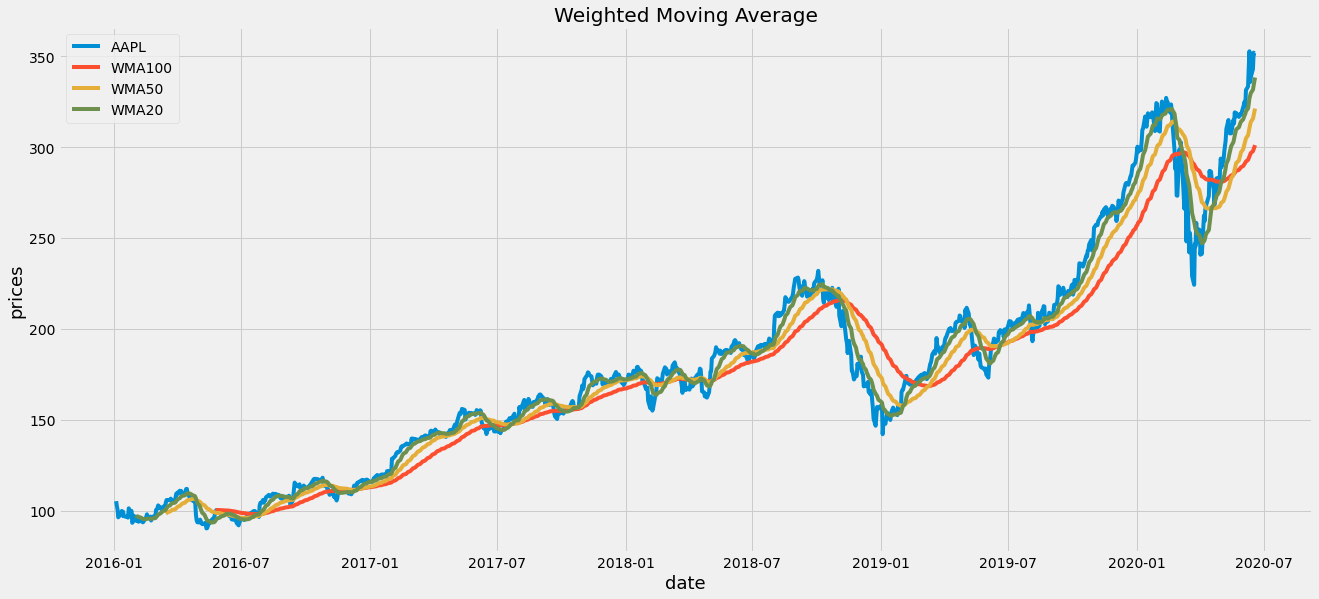

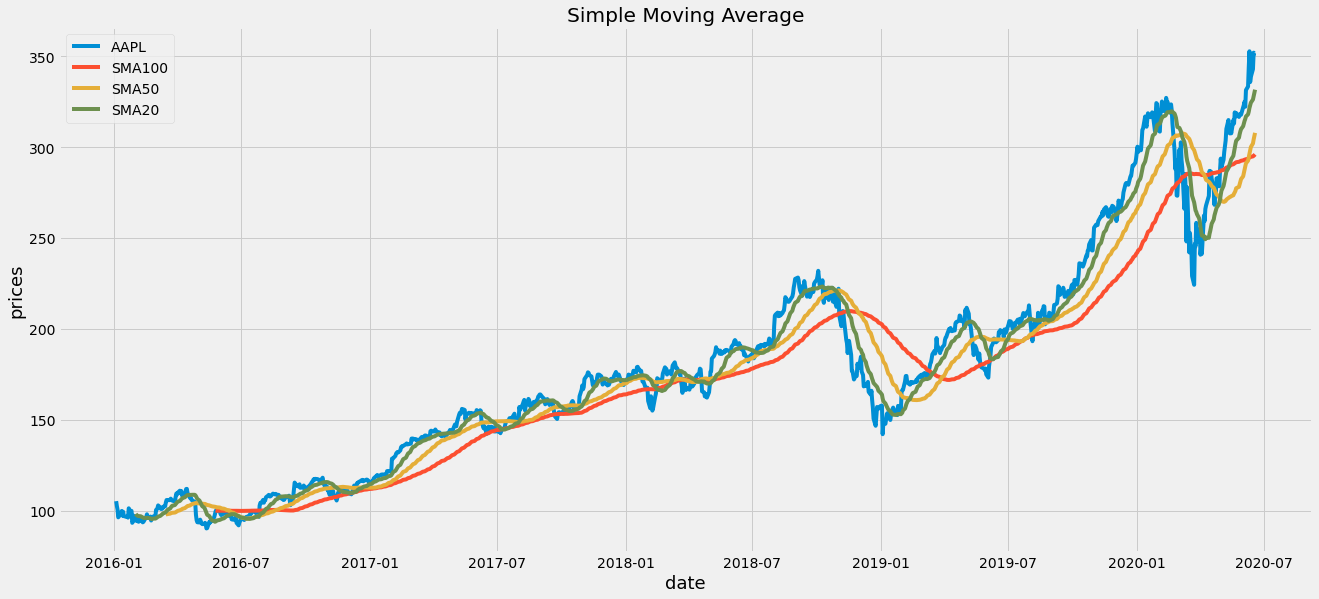

,Moving_average100,Moving_average50,Moving_average20,Price
Date,,,,
2016-01-04,NaN,NaN,NaN,105.349998
2016-01-05,NaN,NaN,NaN,102.709999
2016-01-06,NaN,NaN,NaN,100.699997
2016-01-07,NaN,NaN,NaN,96.449997
2016-01-08,NaN,NaN,NaN,96.959999
...,...,...,...,...
2020-06-12,294.764500,300.160599,324.546500,338.799988
2020-06-15,295.017399,302.121799,326.310500,342.989990
2020-06-16,295.345899,304.335199,328.166499,352.079987


In [53]:
EMA(Stock_code=StockCode, Start_date=start, Moving_average_param1=100, show_MA1=True, show_MA2=True, show_MA3=True)
WMA(Stock_code=StockCode, Start_date=start, Moving_average_param1=100, show_MA1=True, show_MA2=True, show_MA3=True)
SMA(Stock_code=StockCode, Start_date=start, Moving_average_param1=100, show_MA1=True, show_MA2=True, show_MA3=True)